In [2]:
#Data import
import csv
import requests
import os
import pandas as pd
import numpy as np

url = 'https://nyc3.digitaloceanspaces.com/owid-public/data/energy/owid-energy-data.csv'
response = requests.get(url)
path = '/Users/sebastiansimmel/Desktop/Uni/T3/AdPro/Project/github/group_12/Prototypes'
with open(os.path.join(path,'downloaded_data.csv'), 'w') as f:
    writer = csv.writer(f)
    for line in response.iter_lines():
        writer.writerow(line.decode('utf-8').split(','))

filename='downloaded_data.csv'
df = pd.read_csv(filename) 
display(df.head())

iso_code      country  year  coal_prod_change_pct  coal_prod_change_twh  \
0      AFG  Afghanistan  1900                   NaN                   NaN   
1      AFG  Afghanistan  1901                   NaN                   0.0   
2      AFG  Afghanistan  1902                   NaN                   0.0   
3      AFG  Afghanistan  1903                   NaN                   0.0   
4      AFG  Afghanistan  1904                   NaN                   0.0   

   gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   oil_prod_change_twh  energy_cons_change_pct  ...  solar_elec_per_capita  \
0                  NaN                     NaN  ...                    NaN   
1                  NaN                     NaN  ...                    NaN   
2                  NaN                     NaN  ...                    NaN   
3                  NaN                     NaN  ...                    NaN   
4                  NaN                     NaN  ...                    NaN   

   solar_energy_per_capita  gdp  wind_share_elec  wind_cons_change_pct  \
0                      NaN  NaN              NaN                   NaN   
1                      NaN  NaN              NaN                   NaN   
2                      NaN  NaN              NaN                   NaN   
3                      NaN  NaN              NaN                   NaN   
4                      NaN  NaN              NaN                   NaN   

   wind_share_energy  wind_cons_change_twh  wind_consumption  \
0                NaN                   NaN               NaN   
1                NaN                   NaN               NaN   
2                NaN                   NaN               NaN   
3                NaN                   NaN               NaN   
4                NaN                   NaN               NaN   

   wind_elec_per_capita  wind_energy_per_capita  
0                   NaN                     NaN  
1                   NaN                     NaN  
2                   NaN                     NaN  
3                   NaN                     NaN  
4                   NaN                     NaN  

[5 rows x 124 columns]

**Task at hand:** 
- Develop a second method that outputs a list of the available countries in the data set.
- Develop a third method that plots an area chart of the "_consumption" columns. This method should have two arguments: a country argument and a normalize argument. The latter normalizes the consumption in relative terms: each year, consumption should always be 100%.
- The latter method should return a ValueError when the chosen country does not exist.

In [3]:
def method_2():
    """
    Returns a list of available countries in the data set.
    
    Parameters
    ---------------
        Nothing.
        
    Returns
    ---------------
        List of unique countries in column "country"
    
    """
    return list(np.unique(df["country"]))

method_2()

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia Pacific',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'CIS',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Central America',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Czechoslovakia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Eastern Africa',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',

In [5]:
import matplotlib
matplotlib.style.use("seaborn")

def method_3(self,country: str, normalized: bool):
    """
    Plots an area chart comparing the consumption of energy types since recording started.

    Parameters
    ---------------
    country: str
        The country upon which the request is made 
    normalized: bool
        If true, normalizes the consumption in relative terms: each year, consumption is 100%.

    Returns
    ---------------
    Nothing, the function only plots the graph.
    """

    if country not in list(np.unique(self.dataset["country"])):
        raise KeyError("Chosen country does not exist.")

    df_country = self.dataset.loc[(self.dataset["country"] == country)]
    df_country_consumption = pd.concat([df_country[["iso_code", "country", "year"]], df_country.filter(regex = "_consumption")], axis = 1)
    df_country_consumption.drop(["fossil_fuel_consumption", "low_carbon_consumption", "primary_energy_consumption", "renewables_consumption"], axis = 1, inplace = True)
    df_country_consumption.dropna(axis = 0, how = "all", thresh = 4 , inplace = True)

    if normalized == True:
        df_country_consumption = pd.concat([df_country_consumption[["iso_code", "country", "year"]], 
                                            df_country_consumption.iloc[:, 3:].apply(lambda x: x / x.sum(), axis = 1)], axis = 1)

    df_country_consumption.plot.area(x = "year", stacked = True, figsize = (15, 10), title = (country + "'s Energy Consumption by Type"),
                                     grid = True, xlabel = "Year", ylabel = "Consumption")

In [6]:
method_3("Germany", False)

TypeError: method_3() missing 1 required positional argument: 'normalized'

In [7]:
    def method_3(country: str, normalized: bool):
        """
        Plots an area chart comparing the consumption of energy types since recording started.

        Parameters
        ---------------
        country: str
            The country upon which the request is made 
        normalized: bool
            If true, normalizes the consumption in relative terms: each year, consumption is 100%.

        Returns
        ---------------
        Nothing, the function only plots the graph.
        """

        if country not in list(np.unique(df["country"])):
            raise KeyError("Chosen country does not exist.")

        df_country = df[(df["country"] == country)] #Only look at defined country
        df_country_consumption = pd.concat([df_country[["iso_code", "country", "year"]], df_country.filter(regex = "_consumption")], axis = 1)
        df_country_consumption.drop(["fossil_fuel_consumption", "low_carbon_consumption", "primary_energy_consumption", "renewables_consumption"], axis = 1, inplace = True)
        df_country_consumption.dropna(axis = 0, how = "all", thresh = 4 , inplace = True)

        if normalized == True:
            df_country_consumption = pd.concat([df_country_consumption[["iso_code", "country", "year"]], df_country_consumption.iloc[:, 3:].apply(lambda x: x / x.sum(), axis = 1)], axis = 1)

        df_country_consumption.plot.area(x = "year", stacked = True, figsize = (15, 10), title = (country + "'s Energy Consumption by Type"), 
                      grid = True, xlabel = "Year", ylabel = "Consumption") #plot area chart
        

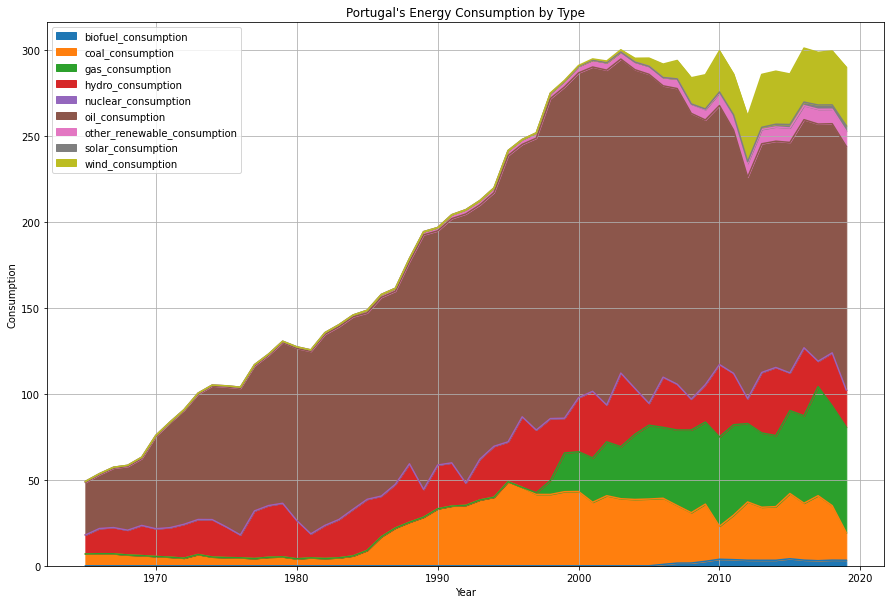

In [8]:
method_3("Portugal", False)

In [ ]:
# Create the total consumption column based on 'primary energy consumption'
        df_aggregate = self.dataset.groupby(by = "country").sum().reset_index()
        all_columns = list(df_aggregate.columns)
        
        #relevant_columns = list(filter(lambda x: '_consumption' in x, all_columns))
        # This line was previously used to sum the consumption columns. 
        # However this results in a false sum, beacuse the data set already holds sums of the "_consumption" columns. 
        # For example the column 'primary_energy_consumption' already is a sum of all the primary energy sources. 
        # Therefore we are going to use it as "total_consumption"
        
        relevant_columns = 'primary_energy_consumption'
        df_aggregate['total_consumption'] = df_aggregate[relevant_columns].sum(axis = 1, skipna = True)